dog.8011.jpg


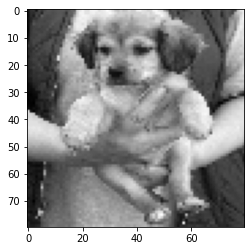

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
for p in os.listdir("train-test/train"):
    print(p)
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join("train-test/train",p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break


In [11]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        if p == ".DS_Store":
            continue
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
path="train-test/train"

create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [15]:

X.shape

(25000, 80, 80, 1)

In [4]:
model = Sequential()


# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 169s 271ms/step - loss: 0.6205 - accuracy: 0.6505 - val_loss: 0.5604 - val_accuracy: 0.7162
Epoch 2/10
625/625 [==============================] - 168s 269ms/step - loss: 0.5200 - accuracy: 0.7451 - val_loss: 0.4876 - val_accuracy: 0.7658
Epoch 3/10
625/625 [==============================] - 153s 244ms/step - loss: 0.4627 - accuracy: 0.7821 - val_loss: 0.4734 - val_accuracy: 0.7724
Epoch 4/10
625/625 [==============================] - 152s 243ms/step - loss: 0.4144 - accuracy: 0.8112 - val_loss: 0.4494 - val_accuracy: 0.7934
Epoch 5/10
625/625 [==============================] - 152s 244ms/step - loss: 0.3718 - accuracy: 0.8321 - val_loss: 0.4539 - val_accuracy: 0.7902
Epoch 6/10
625/625 [==============================] - 152s 243ms/step - loss: 0.3199 - accuracy: 0.8583 - val_loss: 0.4879 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 153s 245ms/step - loss: 0.2634 - accuracy: 0.8865 - val_loss: 0.5869 -

In [7]:
model.save('dogs-cats')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dogs-cats/assets
